In [98]:
#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy

import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

## some other packages
from scipy import stats
from matplotlib import ticker

In [99]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'lab' : {
        'vmin' : 20, 
        'vmax' : 2000},
    'gul' : {
        'vmin' : 20, 
        'vmax' : 1000},
    'noe' : {
        'vmin' : 10, 
        'vmax' : 1600},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'YlGnBu',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}



reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}

In [100]:
def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)


## Function to crop the dataset
def Crops(coord, d_set):
    lon1, lon2 = reg_ext[coord]['lon']
    lat1, lat2 = reg_ext[coord]['lat']
    name_fig = reg_ext[coord]['name']

    return(d_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2)))


In [101]:
dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
fl_n1 = 'ARMOR_*.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)
mld_a = c_armor.mlotst

## Calculating moments for the datasets

### Gulf Stream

In [102]:
coord = 'gul'
cropped_d = Crops(coord, mld_a)
n_bins = 250

mn = np.nanmin(cropped_d[:])
mx = np.nanmax(cropped_d[:])

print(mn,mx)

10.0998535 3999.0


In [103]:
ind = np.linspace(mn, mx,n_bins)

m = []
v = []
s = []
k = []
md = []
ct = []

#len(cropped_d.time)
for i in range(len(cropped_d.time)):
    d_frame = cropped_d[i].to_dataframe()
    d_nonan = d_frame.dropna(how='any')
    
    mean = d_nonan.mlotst.mean()
    var = d_nonan.mlotst.var()
    skw = stats.skew(d_nonan.mlotst)
    krt = stats.kurtosis(d_nonan.mlotst, fisher=True)
    mod = stats.mode(d_nonan.mlotst)
    
    #values = d_nonan.mlotst
    #hist, bins = np.histogram(values, bins=n_bins, range=(mn, mx), normed=False)
    
    m = np.append(m, mean)
    v = np.append(v, var)
    s = np.append(s, skw)
    k = np.append(k, krt)
    md = np.append(md, mod.mode)
    ct = np.append(ct, mod.count)


<IPython.core.display.Javascript object>


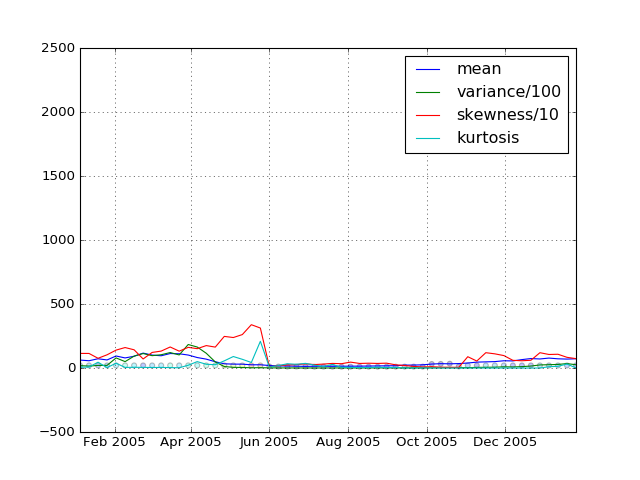

In [108]:
%matplotlib notebook
x = cropped_d.time.values
s = ct

plt.xlim(x[0], x[55])

plt.plot(x, m, label='mean')
plt.scatter(x, md, marker='o', c=s, alpha=0.25)
#plt.plot(md, '*')
plt.plot(x, v/100, label='variance/100')
plt.plot(x, s/10, label='skewness/10')
plt.plot(x, k, label='kurtosis')
plt.grid()
plt.legend()
plt.show()
